In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/labbelajar2new/project/sentimen/tweet.csv')
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


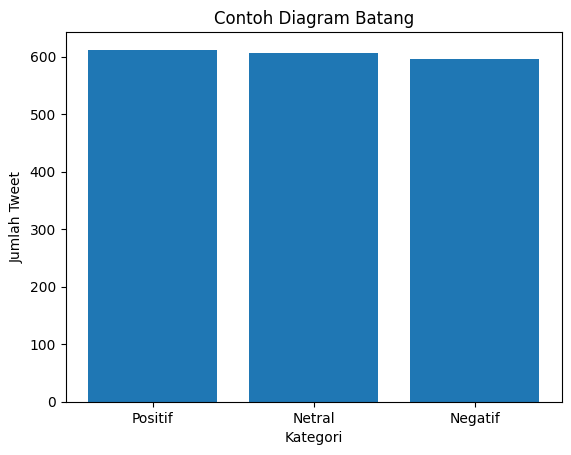

In [5]:
import matplotlib.pyplot as plt

# Data untuk diagram batang
categories = ['Positif', 'Netral', 'Negatif']

# Menghitung jumlah tweet untuk setiap kategori
positif_count = len(data[data['sentimen'] == 'positif'])
netral_count = len(data[data['sentimen'] == 'netral'])
negatif_count = len(data[data['sentimen'] == 'negatif'])

# Nilai untuk setiap kategori
values = [positif_count, netral_count, negatif_count]

# Membuat diagram batang
plt.bar(categories, values)

# Menambahkan judul dan label
plt.title('Contoh Diagram Batang')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tweet')

# Menampilkan diagram
plt.show()

In [6]:
import re
import pandas as pd
import numpy as np
import random
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocessing(text):
    # case folding
    text = text.lower()

    # remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus link menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
    # Menghapus hashtag menggunakan regex
    text = re.sub(r'#\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # stopword removal
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    words = text.split()
    text = " ".join([word for word in words if word not in stopwords])

    return text

In [7]:
data["tweet"] = data["tweet"].apply(preprocessing)
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,kata prabowo indonesia dihargai bangsa asing b...
1,1,netral,batuan langka tasbih jokowi hadiah habib luthf...
2,2,netral,era jokowi ekonomi indonesia semakin baik indo...
3,3,positif,sumatera selatan asian games berdampak pd ekon...
4,4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...,...
1810,1810,netral,negarawan sejati sll bangga mengedepankan harg...
1811,1811,netral,hrs ceramah damai indonesiaku perekonomian mak...
1812,1812,netral,bangun bangsa dgn mendukung perekonomian negar...
1813,1813,netral,bantu majukan perekonomian bangsa bersama pak ...


In [8]:
data = data.drop(columns=['Unnamed: 0'])
data

,sentimen,tweet
0,negatif,kata prabowo indonesia dihargai bangsa asing b...
1,netral,batuan langka tasbih jokowi hadiah habib luthf...
2,netral,era jokowi ekonomi indonesia semakin baik indo...
3,positif,sumatera selatan asian games berdampak pd ekon...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga mengedepankan harg...
1811,netral,hrs ceramah damai indonesiaku perekonomian mak...
1812,netral,bangun bangsa dgn mendukung perekonomian negar...
1813,netral,bantu majukan perekonomian bangsa bersama pak ...


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import pandas as pd

# Contoh data
# data = pd.read_csv('tweet.csv')  # kalau sudah ada data csv

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Integrasi tqdm dengan pandas apply
tqdm.pandas(desc="Stemming progress")

# Terapkan stemming dengan progress bar, pastikan input string
data["tweet"] = data["tweet"].astype(str).progress_apply(lambda x: stemmer.stem(x))

print(data)


Stemming progress: 100%|██████████| 1815/1815 [04:45<00:00,  6.36it/s]

     sentimen                                              tweet
0     negatif  kata prabowo indonesia harga bangsa asing beri...
1      netral  batu langka tasbih jokowi hadiah habib luthfi ...
2      netral  era jokowi ekonomi indonesia makin baik indone...
3     positif  sumatera selatan asi games dampak pd ekonomi l...
4     negatif  negara ngutang buat bngun infrastruktur udah d...
...       ...                                                ...
1810   netral  negarawan sejati sll bangga depan harga diri b...
1811   netral  hrs ceramah damai indonesia ekonomi makin baik...
1812   netral  bangun bangsa dgn dukung ekonomi negara sama p...
1813   netral      bantu maju ekonomi bangsa sama pak jokowi yuk
1814   netral  pak jokowi ubah cara pandang ekonomi kini semu...

[1815 rows x 2 columns]


In [10]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentimen'])
X = data['tweet'].values

In [11]:
X

array(['kata prabowo indonesia harga bangsa asing berita hoax buat kuasa kan rockygerung',
       'batu langka tasbih jokowi hadiah habib luthfi harga mercy',
       'era jokowi ekonomi indonesia makin baik indonesiamaju jokowilagi jokowimenangtotaldebat pictwittercomwythnxstp',
       ...,
       'bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja',
       'bantu maju ekonomi bangsa sama pak jokowi yuk',
       'pak jokowi ubah cara pandang ekonomi kini semua orang hubung indonesia jadi lebih produktif efisien menyatuputihjokowi'],
      dtype=object)

In [12]:
# Setelah itu, fit_transform
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=2000, ngram_range=(1, 3), use_idf=True)
X = tv.fit_transform(data['tweet']).toarray()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452, 2000), (363, 2000), (1452,), (363,))

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definisikan parameter yang akan diuji
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Parameter smoothing
    'fit_prior': [True, False],          # Apakah menggunakan prior atau tidak
}

# Inisialisasi model MultinomialNB
nb_model = MultinomialNB()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=1)

# Fit model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Model terbaik
best_nb_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best = best_nb_model.predict(X_test)

# Hitung metrik lainnya
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='macro')
recall = recall_score(y_test, y_pred_best, average='macro')
f1 = f1_score(y_test, y_pred_best, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.5, 'fit_prior': True}
Best F1 Score: 0.611100335646537
Accuracy: 0.6419
Precision: 0.6492
Recall: 0.6457
F1 Score: 0.6413


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:


y_pred = model.predict(X_test)
y_pred
# Perhitungan metrik untuk multi-class
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # atau 'weighted'
recall = recall_score(y_test, y_pred, average='macro')        # atau 'weighted'
f1 = f1_score(y_test, y_pred, average='macro')                # atau 'weighted'

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.6419
Precision: 0.6509
Recall: 0.6457
F1 Score: 0.6417
Confusion Matrix:
[[89  9 17]
 [22 71 25]
 [39 18 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       115
           1       0.72      0.60      0.66       118
           2       0.63      0.56      0.60       130

    accuracy                           0.64       363
   macro avg       0.65      0.65      0.64       363
weighted avg       0.65      0.64      0.64       363



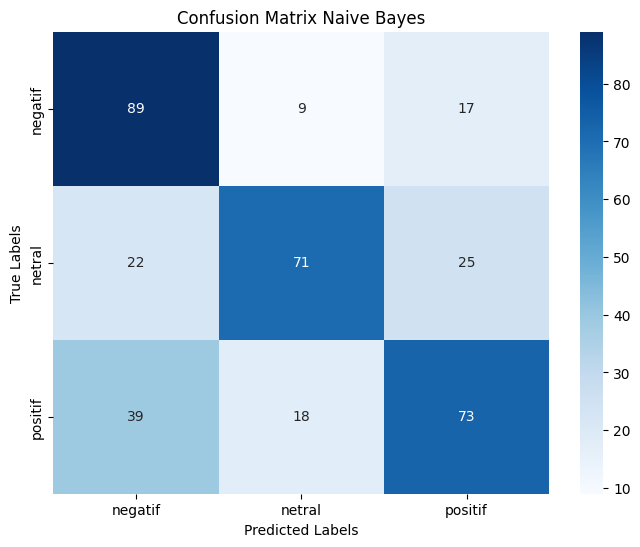

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'naive_bayes_model.pkl')

print("Model has been exported successfully.")

Model has been exported successfully.


In [22]:
import joblib

# Save the trained model
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the TfidfVectorizer
joblib.dump(tv, 'tfidf_vectorizer.pkl')

print("Model and TfidfVectorizer have been exported successfully.")


Model and TfidfVectorizer have been exported successfully.


In [24]:
# Save the LabelEncoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

print("LabelEncoder has been exported successfully.")

LabelEncoder has been exported successfully.
